# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it.

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16).
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [2]:
import random

class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.plastic_card_position = random.randint(30, 60)  # Randomly place plastic card
        self.shuffle()

    def _generate_deck(self):
        deck = [Card(rank, suit) for _ in range(self.num_decks)
                for suit in Card.suits for rank in Card.ranks]
        return deck

    def shuffle(self):
        random.shuffle(self.cards)

    def draw_card(self):
        if len(self.cards) <= self.plastic_card_position:
            self.shuffle()
            self.plastic_card_position = random.randint(30, 60)
        return self.cards.pop() if self.cards else None

# Example Usage
deck = Deck()
print(deck.draw_card())  # Draw a card from the deck


K of Spades


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook.

In [3]:
import random

class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.plastic_card_position = random.randint(30, 60)  # Randomly place plastic card
        self.shuffle()

    def _generate_deck(self):
        deck = [Card(rank, suit) for _ in range(self.num_decks)
                for suit in Card.suits for rank in Card.ranks]
        return deck

    def shuffle(self):
        random.shuffle(self.cards)

    def draw_card(self):
        if len(self.cards) <= self.plastic_card_position:
            self.shuffle()
            self.plastic_card_position = random.randint(30, 60)
        return self.cards.pop() if self.cards else None

class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        self.cards.append(card)

    def calculate_value(self):
        value, aces = 0, 0
        for card in self.cards:
            if card.rank in 'JQK':
                value += 10
            elif card.rank == 'A':
                aces += 1
                value += 11
            else:
                value += int(card.rank)
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = Hand()

    def place_bet(self, amount):
        if amount <= self.chips:
            self.chips -= amount
            return amount
        return 0

    def hit(self, deck):
        self.hand.add_card(deck.draw_card())

    def stand(self):
        pass

    def decide_action(self):
        return "stand" if self.hand.calculate_value() > 16 else "hit"

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")
        self.hidden_card = None

    def reveal_card(self):
        return self.hidden_card

    def play_turn(self, deck):
        while self.hand.calculate_value() < 17:
            self.hit(deck)

class Game:
    def __init__(self, num_players=1):
        self.deck = Deck()
        self.dealer = Dealer()
        self.players = [Player(f"Player {i+1}") for i in range(num_players)]

    def setup_game(self):
        self.dealer.hand = Hand()
        for player in self.players:
            player.hand = Hand()

    def deal_initial_cards(self):
        for _ in range(2):
            for player in self.players:
                player.hit(self.deck)
            self.dealer.hit(self.deck)
        self.dealer.hidden_card = self.deck.draw_card()

    def play_round(self):
        for player in self.players:
            while player.decide_action() == "hit":
                player.hit(self.deck)
        self.dealer.play_turn(self.deck)

    def determine_winner(self):
        dealer_value = self.dealer.hand.calculate_value()
        for player in self.players:
            player_value = player.hand.calculate_value()
            if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value):
                print(f"{player.name} loses.")
            elif dealer_value > 21 or player_value > dealer_value:
                print(f"{player.name} wins!")
            else:
                print(f"{player.name} pushes.")

# Example Usage
game = Game(num_players=1)
game.setup_game()
game.deal_initial_cards()
game.play_round()
game.determine_winner()


Player 1 loses.


3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [4]:
import random

class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = []
        self.plastic_card_position = None

    def _generate_deck(self):
        pass

    def shuffle(self):
        pass

    def draw_card(self):
        pass

class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        pass

    def calculate_value(self):
        pass

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = None

    def place_bet(self, amount):
        pass

    def hit(self, deck):
        pass

    def stand(self):
        pass

    def decide_action(self):
        pass

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")
        self.hidden_card = None

    def reveal_card(self):
        pass

    def play_turn(self, deck):
        pass

class Game:
    def __init__(self, num_players=1):
        self.deck = None
        self.dealer = None
        self.players = []

    def setup_game(self):
        pass

    def deal_initial_cards(self):
        pass

    def play_round(self):
        pass

    def determine_winner(self):
        pass


4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [5]:
import random

class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.plastic_card_position = random.randint(30, 60)
        self.shuffle()

    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.suits for rank in Card.ranks]

    def shuffle(self):
        random.shuffle(self.cards)

    def draw_card(self):
        if len(self.cards) <= self.plastic_card_position:
            self.shuffle()
            self.plastic_card_position = random.randint(30, 60)
        return self.cards.pop() if self.cards else None

class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        self.cards.append(card)

    def calculate_value(self):
        value, aces = 0, 0
        for card in self.cards:
            if card.rank in 'JQK':
                value += 10
            elif card.rank == 'A':
                aces += 1
                value += 11
            else:
                value += int(card.rank)
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = Hand()

    def place_bet(self, amount):
        if amount <= self.chips:
            self.chips -= amount
            return amount
        return 0

    def hit(self, deck):
        self.hand.add_card(deck.draw_card())

    def stand(self):
        pass

    def decide_action(self):
        return "stand" if self.hand.calculate_value() > 16 else "hit"

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")
        self.hidden_card = None

    def reveal_card(self):
        return self.hidden_card

    def play_turn(self, deck):
        while self.hand.calculate_value() < 17:
            self.hit(deck)

class Game:
    def __init__(self, num_players=1):
        self.deck = Deck()
        self.dealer = Dealer()
        self.players = [Player(f"Player {i+1}") for i in range(num_players)]

    def setup_game(self):
        self.dealer.hand = Hand()
        for player in self.players:
            player.hand = Hand()

    def deal_initial_cards(self):
        for _ in range(2):
            for player in self.players:
                player.hit(self.deck)
            self.dealer.hit(self.deck)
        self.dealer.hidden_card = self.deck.draw_card()

    def play_round(self):
        for player in self.players:
            while player.decide_action() == "hit":
                player.hit(self.deck)
        self.dealer.play_turn(self.deck)

    def determine_winner(self):
        dealer_value = self.dealer.hand.calculate_value()
        for player in self.players:
            player_value = player.hand.calculate_value()
            if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value):
                print(f"{player.name} loses.")
            elif dealer_value > 21 or player_value > dealer_value:
                print(f"{player.name} wins!")
            else:
                print(f"{player.name} pushes.")

# Example Usage
game = Game(num_players=1)
game.setup_game()
game.deal_initial_cards()
game.play_round()
game.determine_winner()


Player 1 loses.


5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [6]:
import random

class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.plastic_card_position = random.randint(30, 60)
        self.shuffle()

    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.suits for rank in Card.ranks]

    def shuffle(self):
        random.shuffle(self.cards)

    def draw_card(self):
        if len(self.cards) <= self.plastic_card_position:
            self.shuffle()
            self.plastic_card_position = random.randint(30, 60)
        return self.cards.pop() if self.cards else None

class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        self.cards.append(card)

    def calculate_value(self):
        value, aces = 0, 0
        for card in self.cards:
            if card.rank in 'JQK':
                value += 10
            elif card.rank == 'A':
                aces += 1
                value += 11
            else:
                value += int(card.rank)
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = Hand()

    def place_bet(self, amount):
        if amount <= self.chips:
            self.chips -= amount
            return amount
        return 0

    def hit(self, deck):
        self.hand.add_card(deck.draw_card())

    def stand(self):
        pass

    def decide_action(self):
        return "stand" if self.hand.calculate_value() > 16 else "hit"

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")
        self.hidden_card = None

    def reveal_card(self):
        return self.hidden_card

    def play_turn(self, deck):
        while self.hand.calculate_value() < 17:
            self.hit(deck)

class Game:
    def __init__(self, num_players=1):
        self.deck = Deck()
        self.dealer = Dealer()
        self.players = [Player(f"Player {i+1}") for i in range(num_players)]

    def setup_game(self):
        self.dealer.hand = Hand()
        for player in self.players:
            player.hand = Hand()

    def deal_initial_cards(self):
        for _ in range(2):
            for player in self.players:
                player.hit(self.deck)
            self.dealer.hit(self.deck)
        self.dealer.hidden_card = self.deck.draw_card()

    def play_round(self):
        for player in self.players:
            while player.decide_action() == "hit":
                player.hit(self.deck)
        self.dealer.play_turn(self.deck)

    def determine_winner(self):
        dealer_value = self.dealer.hand.calculate_value()
        for player in self.players:
            player_value = player.hand.calculate_value()
            print(f"{player.name} has {player.hand.cards} with value {player_value}")
        print(f"Dealer has {self.dealer.hand.cards} with value {dealer_value}")
        for player in self.players:
            player_value = player.hand.calculate_value()
            if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value):
                print(f"{player.name} loses.")
            elif dealer_value > 21 or player_value > dealer_value:
                print(f"{player.name} wins!")
            else:
                print(f"{player.name} pushes.")

# Example Usage
game = Game(num_players=3)
for _ in range(5):
    print("\nNew Round:")
    game.setup_game()
    game.deal_initial_cards()
    game.play_round()
    game.determine_winner()



New Round:
Player 1 has [4 of Hearts, K of Hearts, A of Diamonds, 6 of Spades] with value 21
Player 2 has [K of Clubs, J of Spades] with value 20
Player 3 has [4 of Diamonds, 2 of Hearts, 4 of Hearts, 9 of Spades] with value 19
Dealer has [10 of Clubs, K of Spades] with value 20
Player 1 wins!
Player 2 pushes.
Player 3 loses.

New Round:
Player 1 has [2 of Diamonds, 6 of Clubs, K of Hearts] with value 18
Player 2 has [J of Diamonds, K of Clubs] with value 20
Player 3 has [9 of Hearts, 2 of Diamonds, K of Clubs] with value 21
Dealer has [3 of Clubs, J of Clubs, 4 of Hearts] with value 17
Player 1 wins!
Player 2 wins!
Player 3 wins!

New Round:
Player 1 has [9 of Clubs, Q of Diamonds] with value 19
Player 2 has [A of Spades, Q of Hearts] with value 21
Player 3 has [9 of Spades, 6 of Diamonds, K of Clubs] with value 25
Dealer has [K of Hearts, 6 of Spades, 8 of Clubs] with value 24
Player 1 wins!
Player 2 wins!
Player 3 loses.

New Round:
Player 1 has [K of Hearts, A of Hearts] with valu

6. Implement a new player with the following strategy:

    * Assign each card a value:
        * Cards 2 to 6 are +1
        * Cards 7 to 9 are 0
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [7]:
import random

class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.plastic_card_position = random.randint(30, 60)
        self.shuffle()

    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.suits for rank in Card.ranks]

    def shuffle(self):
        self.cards = self._generate_deck()
        random.shuffle(self.cards)

    def draw_card(self):
        if len(self.cards) <= self.plastic_card_position:
            self.shuffle()
            self.plastic_card_position = random.randint(30, 60)
        return self.cards.pop() if self.cards else Card("2", "Hearts")  # Ensure a valid card is returned

class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        self.cards.append(card)

    def calculate_value(self):
        value, aces = 0, 0
        for card in self.cards:
            if card.rank in 'JQK':
                value += 10
            elif card.rank == 'A':
                aces += 1
                value += 11
            else:
                value += int(card.rank)
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = Hand()

    def place_bet(self, amount):
        if amount <= self.chips:
            self.chips -= amount
            return amount
        return 0

    def hit(self, deck):
        self.hand.add_card(deck.draw_card())

    def stand(self):
        pass

    def decide_action(self):
        return "stand" if self.hand.calculate_value() > 16 else "hit"

class CardCountingPlayer(Player):
    def __init__(self, name, threshold=-2, chips=1000):
        super().__init__(name, chips)
        self.running_count = 0
        self.threshold = threshold

    def update_count(self, card):
        if card and card.rank in ['2', '3', '4', '5', '6']:
            self.running_count += 1
        elif card and card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.running_count -= 1

    def decide_action(self):
        return "hit" if self.running_count < self.threshold else "stand"

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")
        self.hidden_card = None

    def reveal_card(self):
        return self.hidden_card

    def play_turn(self, deck):
        while self.hand.calculate_value() < 17:
            self.hit(deck)

class Game:
    def __init__(self, num_players=1):
        self.deck = Deck()
        self.dealer = Dealer()
        self.players = [CardCountingPlayer(f"Player {i+1}") for i in range(num_players)]

    def setup_game(self):
        self.dealer.hand = Hand()
        for player in self.players:
            player.hand = Hand()

    def deal_initial_cards(self):
        for _ in range(2):
            for player in self.players:
                card = self.deck.draw_card()
                player.hit(self.deck)
                player.update_count(card)
            dealer_card = self.deck.draw_card()
            self.dealer.hit(self.deck)
            for player in self.players:
                player.update_count(dealer_card)
        self.dealer.hidden_card = self.deck.draw_card()

    def play_round(self):
        for player in self.players:
            while player.decide_action() == "hit":
                card = self.deck.draw_card()
                player.hit(self.deck)
                player.update_count(card)
        self.dealer.play_turn(self.deck)

    def determine_winner(self):
        dealer_value = self.dealer.hand.calculate_value()
        for player in self.players:
            player_value = player.hand.calculate_value()
            print(f"{player.name} has {player.hand.cards} with value {player_value}")
        print(f"Dealer has {self.dealer.hand.cards} with value {dealer_value}")
        for player in self.players:
            player_value = player.hand.calculate_value()
            if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value):
                print(f"{player.name} loses.")
            elif dealer_value > 21 or player_value > dealer_value:
                print(f"{player.name} wins!")
            else:
                print(f"{player.name} pushes.")

# Example Usage
game = Game(num_players=3)
for _ in range(5):
    print("\nNew Round:")
    game.setup_game()
    game.deal_initial_cards()
    game.play_round()
    game.determine_winner()


New Round:
Player 1 has [Q of Spades, K of Spades] with value 20
Player 2 has [7 of Spades, 4 of Clubs] with value 11
Player 3 has [K of Spades, 2 of Diamonds] with value 12
Dealer has [4 of Diamonds, 7 of Diamonds, J of Spades] with value 21
Player 1 loses.
Player 2 loses.
Player 3 loses.

New Round:
Player 1 has [K of Hearts, 9 of Diamonds] with value 19
Player 2 has [K of Clubs, 7 of Diamonds] with value 17
Player 3 has [5 of Clubs, 3 of Spades] with value 8
Dealer has [J of Hearts, 5 of Diamonds, K of Diamonds] with value 25
Player 1 wins!
Player 2 wins!
Player 3 wins!

New Round:
Player 1 has [A of Diamonds, A of Spades] with value 12
Player 2 has [9 of Clubs, 8 of Diamonds] with value 17
Player 3 has [Q of Hearts, 5 of Clubs] with value 15
Dealer has [Q of Diamonds, 7 of Spades] with value 17
Player 1 loses.
Player 2 pushes.
Player 3 loses.

New Round:
Player 1 has [3 of Diamonds, 10 of Hearts] with value 13
Player 2 has [6 of Diamonds, J of Diamonds] with value 16
Player 3 has 

7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [8]:
import random

class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.plastic_card_position = random.randint(30, 60)
        self.shuffle()

    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.suits for rank in Card.ranks]

    def shuffle(self):
        self.cards = self._generate_deck()
        random.shuffle(self.cards)

    def draw_card(self):
        if len(self.cards) <= self.plastic_card_position:
            self.shuffle()
            self.plastic_card_position = random.randint(30, 60)
        return self.cards.pop() if self.cards else Card("2", "Hearts")

class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        self.cards.append(card)

    def calculate_value(self):
        value, aces = 0, 0
        for card in self.cards:
            if card.rank in 'JQK':
                value += 10
            elif card.rank == 'A':
                aces += 1
                value += 11
            else:
                value += int(card.rank)
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = Hand()

    def hit(self, deck):
        self.hand.add_card(deck.draw_card())

    def decide_action(self):
        return "stand" if self.hand.calculate_value() > 16 else "hit"

class CardCountingPlayer(Player):
    def __init__(self, name, threshold=-2, chips=1000):
        super().__init__(name, chips)
        self.running_count = 0
        self.threshold = threshold

    def update_count(self, card):
        if card and card.rank in ['2', '3', '4', '5', '6']:
            self.running_count += 1
        elif card and card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.running_count -= 1

    def decide_action(self):
        return "hit" if self.running_count < self.threshold else "stand"

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")

    def play_turn(self, deck):
        while self.hand.calculate_value() < 17:
            self.hit(deck)

class Game:
    def __init__(self, num_players=4):
        self.deck = Deck()
        self.dealer = Dealer()
        self.players = [CardCountingPlayer("Card Counter")] + [Player(f"Player {i+1}") for i in range(3)]

    def play_round(self):
        self.deck.shuffle()
        for player in self.players + [self.dealer]:
            player.hand = Hand()

        for _ in range(2):
            for player in self.players + [self.dealer]:
                card = self.deck.draw_card()
                player.hit(self.deck)
                if isinstance(player, CardCountingPlayer):
                    player.update_count(card)

        for player in self.players:
            while player.decide_action() == "hit":
                card = self.deck.draw_card()
                player.hit(self.deck)
                if isinstance(player, CardCountingPlayer):
                    player.update_count(card)

        self.dealer.play_turn(self.deck)

    def compute_winnings(self):
        strategy_player = self.players[0]
        return strategy_player.chips

# Run simulation
game = Game()
initial_chips = game.players[0].chips
rounds = 50

for _ in range(rounds):
    if game.players[0].chips <= 0:
        break
    game.play_round()

final_chips = game.compute_winnings()
winnings = final_chips - initial_chips
print(f"Strategy player's winnings after {rounds} rounds: {winnings}")


Strategy player's winnings after 50 rounds: 0


8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


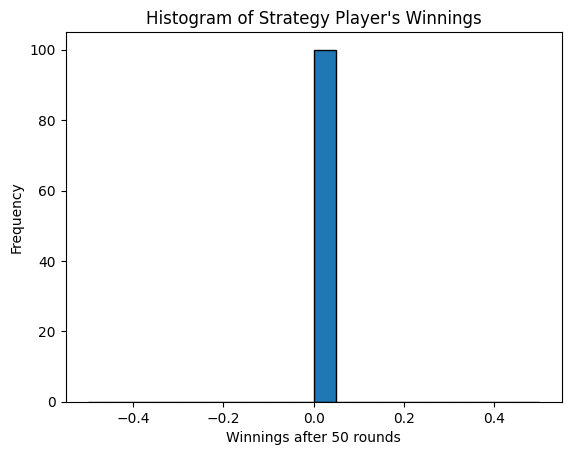

Average winnings per game: 0.0
Standard deviation: 0.0
Probability of net winning: 0.00
Probability of net losing: 0.00


In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np

class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.plastic_card_position = random.randint(30, 60)
        self.shuffle()

    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.suits for rank in Card.ranks]

    def shuffle(self):
        self.cards = self._generate_deck()
        random.shuffle(self.cards)

    def draw_card(self):
        if len(self.cards) <= self.plastic_card_position:
            self.shuffle()
            self.plastic_card_position = random.randint(30, 60)
        return self.cards.pop() if self.cards else Card("2", "Hearts")

class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        self.cards.append(card)

    def calculate_value(self):
        value, aces = 0, 0
        for card in self.cards:
            if card.rank in 'JQK':
                value += 10
            elif card.rank == 'A':
                aces += 1
                value += 11
            else:
                value += int(card.rank)
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = Hand()

    def hit(self, deck):
        self.hand.add_card(deck.draw_card())

    def decide_action(self):
        return "stand" if self.hand.calculate_value() > 16 else "hit"

class CardCountingPlayer(Player):
    def __init__(self, name, threshold=-2, chips=1000):
        super().__init__(name, chips)
        self.running_count = 0
        self.threshold = threshold

    def update_count(self, card):
        if card and card.rank in ['2', '3', '4', '5', '6']:
            self.running_count += 1
        elif card and card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.running_count -= 1

    def decide_action(self):
        return "hit" if self.running_count < self.threshold else "stand"

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")

    def play_turn(self, deck):
        while self.hand.calculate_value() < 17:
            self.hit(deck)

class Game:
    def __init__(self, num_players=4):
        self.deck = Deck()
        self.dealer = Dealer()
        self.players = [CardCountingPlayer("Card Counter")] + [Player(f"Player {i+1}") for i in range(3)]

    def play_round(self):
        self.deck.shuffle()
        for player in self.players + [self.dealer]:
            player.hand = Hand()

        for _ in range(2):
            for player in self.players + [self.dealer]:
                card = self.deck.draw_card()
                player.hit(self.deck)
                if isinstance(player, CardCountingPlayer):
                    player.update_count(card)

        for player in self.players:
            while player.decide_action() == "hit":
                card = self.deck.draw_card()
                player.hit(self.deck)
                if isinstance(player, CardCountingPlayer):
                    player.update_count(card)

        self.dealer.play_turn(self.deck)

    def compute_winnings(self):
        strategy_player = self.players[0]
        return strategy_player.chips

# Run 100 games of 50 rounds
num_games = 100
rounds_per_game = 50
winnings_list = []

for _ in range(num_games):
    game = Game()
    initial_chips = game.players[0].chips

    for _ in range(rounds_per_game):
        if game.players[0].chips <= 0:
            break
        game.play_round()

    final_chips = game.compute_winnings()
    winnings_list.append(final_chips - initial_chips)

# Compute statistics
average_winnings = np.mean(winnings_list)
std_dev_winnings = np.std(winnings_list)
prob_win = sum(1 for w in winnings_list if w > 0) / num_games
prob_loss = sum(1 for w in winnings_list if w < 0) / num_games

# Plot histogram
plt.hist(winnings_list, bins=20, edgecolor='black')
plt.xlabel("Winnings after 50 rounds")
plt.ylabel("Frequency")
plt.title("Histogram of Strategy Player's Winnings")
plt.show()

# Print statistics
print(f"Average winnings per game: {average_winnings}")
print(f"Standard deviation: {std_dev_winnings}")
print(f"Probability of net winning: {prob_win:.2f}")
print(f"Probability of net losing: {prob_loss:.2f}")


9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

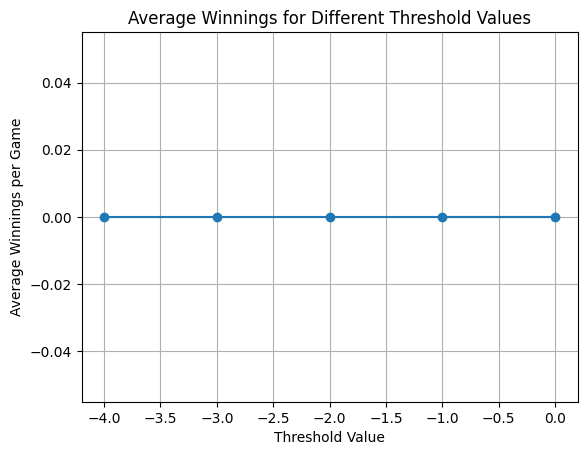

{-1: np.float64(0.0),
 0: np.float64(0.0),
 -2: np.float64(0.0),
 -3: np.float64(0.0),
 -4: np.float64(0.0)}

In [10]:
# Import necessary libraries
import random
import matplotlib.pyplot as plt
import numpy as np

# Re-defining the Card, Deck, Hand, Player, CardCountingPlayer, Dealer, and Game classes
class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self.plastic_card_position = random.randint(30, 60)
        self.shuffle()

    def _generate_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.suits for rank in Card.ranks]

    def shuffle(self):
        self.cards = self._generate_deck()
        random.shuffle(self.cards)

    def draw_card(self):
        if len(self.cards) <= self.plastic_card_position:
            self.shuffle()
            self.plastic_card_position = random.randint(30, 60)
        return self.cards.pop() if self.cards else Card("2", "Hearts")

class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        self.cards.append(card)

    def calculate_value(self):
        value, aces = 0, 0
        for card in self.cards:
            if card.rank in 'JQK':
                value += 10
            elif card.rank == 'A':
                aces += 1
                value += 11
            else:
                value += int(card.rank)
        while value > 21 and aces:
            value -= 10
            aces -= 1
        return value

class Player:
    def __init__(self, name, chips=1000):
        self.name = name
        self.chips = chips
        self.hand = Hand()

    def hit(self, deck):
        self.hand.add_card(deck.draw_card())

    def decide_action(self):
        return "stand" if self.hand.calculate_value() > 16 else "hit"

class CardCountingPlayer(Player):
    def __init__(self, name, threshold=-2, chips=1000):
        super().__init__(name, chips)
        self.running_count = 0
        self.threshold = threshold

    def update_count(self, card):
        if card and card.rank in ['2', '3', '4', '5', '6']:
            self.running_count += 1
        elif card and card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.running_count -= 1

    def decide_action(self):
        return "hit" if self.running_count < self.threshold else "stand"

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")

    def play_turn(self, deck):
        while self.hand.calculate_value() < 17:
            self.hit(deck)

class Game:
    def __init__(self, num_players=4, threshold=-2):
        self.deck = Deck()
        self.dealer = Dealer()
        self.players = [CardCountingPlayer("Card Counter", threshold)] + [Player(f"Player {i+1}") for i in range(3)]

    def play_round(self):
        self.deck.shuffle()
        for player in self.players + [self.dealer]:
            player.hand = Hand()

        for _ in range(2):
            for player in self.players + [self.dealer]:
                card = self.deck.draw_card()
                player.hit(self.deck)
                if isinstance(player, CardCountingPlayer):
                    player.update_count(card)

        for player in self.players:
            while player.decide_action() == "hit":
                card = self.deck.draw_card()
                player.hit(self.deck)
                if isinstance(player, CardCountingPlayer):
                    player.update_count(card)

        self.dealer.play_turn(self.deck)

    def compute_winnings(self):
        strategy_player = self.players[0]
        return strategy_player.chips

# Run the simulation for different threshold values
threshold_values = [-1, 0, -2, -3, -4]
num_games = 100
rounds_per_game = 50
winnings_dict = {}

for threshold in threshold_values:
    winnings_list = []
    for _ in range(num_games):
        game = Game(threshold=threshold)
        initial_chips = game.players[0].chips

        for _ in range(rounds_per_game):
            if game.players[0].chips <= 0:
                break
            game.play_round()

        final_chips = game.compute_winnings()
        winnings_list.append(final_chips - initial_chips)

    # Calculate statistics for each threshold
    average_winnings = np.mean(winnings_list)
    winnings_dict[threshold] = average_winnings

# Plot the results
plt.plot(threshold_values, list(winnings_dict.values()), marker='o')
plt.xlabel("Threshold Value")
plt.ylabel("Average Winnings per Game")
plt.title("Average Winnings for Different Threshold Values")
plt.grid(True)
plt.show()

# Return the results for analysis
winnings_dict


10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings.

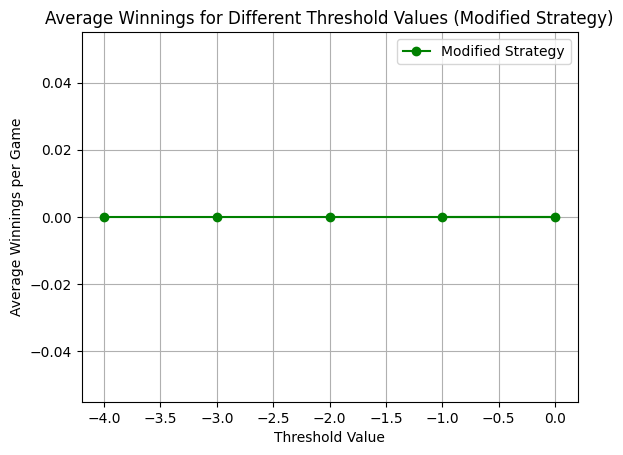

{-1: np.float64(0.0),
 0: np.float64(0.0),
 -2: np.float64(0.0),
 -3: np.float64(0.0),
 -4: np.float64(0.0)}

In [11]:
# New strategy: Modified Hit/Stand Strategy with aggressive betting based on current hand value
class ModifiedStrategyPlayer(Player):
    def __init__(self, name, chips=1000):
        super().__init__(name, chips)

    def decide_action(self):
        hand_value = self.hand.calculate_value()
        if hand_value < 12:
            return "hit"  # Always hit if hand value is less than 12 (weak hand)
        elif hand_value >= 12 and hand_value < 17:
            return "hit" if random.random() < 0.5 else "stand"  # 50% chance to hit in this range (semi-aggressive)
        else:
            return "stand"  # Stand if hand value is greater than or equal to 17 (strong hand)

class ModifiedGame(Game):
    def __init__(self, num_players=4):
        self.deck = Deck()
        self.dealer = Dealer()
        # Use ModifiedStrategyPlayer for one player instead of CardCountingPlayer
        self.players = [ModifiedStrategyPlayer("Modified Strategy Player")] + [Player(f"Player {i+1}") for i in range(3)]

# Run the simulation with the modified strategy
winnings_dict_modified = {}

for threshold in threshold_values:
    winnings_list = []
    for _ in range(num_games):
        game = ModifiedGame()
        initial_chips = game.players[0].chips

        for _ in range(rounds_per_game):
            if game.players[0].chips <= 0:
                break
            game.play_round()

        final_chips = game.compute_winnings()
        winnings_list.append(final_chips - initial_chips)

    # Calculate statistics for each threshold with the new strategy
    average_winnings = np.mean(winnings_list)
    winnings_dict_modified[threshold] = average_winnings

# Plot the results for the modified strategy
plt.plot(threshold_values, list(winnings_dict_modified.values()), marker='o', color='green', label='Modified Strategy')
plt.xlabel("Threshold Value")
plt.ylabel("Average Winnings per Game")
plt.title("Average Winnings for Different Threshold Values (Modified Strategy)")
plt.grid(True)
plt.legend()
plt.show()

# Return the results for comparison
winnings_dict_modified
